In [804]:
# Código feito por Dimas Germano Brandão Soares Silva
# github: https://github.com/dimasgb7  
# linkedin: https://www.linkedin.com/in/dimas-silva-201393120/
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

filmes = pd.read_csv\
    ("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
filmes.columns = ['filmeId','titulo','generos']

avaliacoes = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
avaliacoes.columns = ['usuarioId','filmeId','nota','momento']

# DIA 1

Trabalhando com um data 2 datasets a respeito de filmes:
- Caracterização dos filmes
- Avaliação dos filmes pelos usuários

In [805]:
avaliacoes_filme_1 = avaliacoes.query("filmeId == 1")
descricao_notas_filme_1 = avaliacoes_filme_1.describe()['nota']

In [806]:
nota_media_avaliacao_por_filme = avaliacoes.groupby("filmeId")\
                                            ['nota'].mean()
nota_media_avaliacao_por_filme
filmes_com_media = filmes.join(nota_media_avaliacao_por_filme, on="filmeId")
filmes_com_media.rename(columns = {'nota':'nota_media'},inplace=True)

## Desafio 1

In [807]:
numero_de_filmes_sem_nota=\
filmes_com_media.query("nota_media.isnull()")['filmeId'].count()
print("Numero de filmes sem nota: ", numero_de_filmes_sem_nota)

Numero de filmes sem nota:  18


## Desafio 2 e 3

In [808]:
numero_de_avaliacao_por_filme = avaliacoes.groupby("filmeId")\
                                                  ['nota'].count()
filmes_mod = filmes_com_media
filmes_mod = filmes_mod.join(numero_de_avaliacao_por_filme, on='filmeId')
filmes_mod.rename(columns= {"nota":"numero_de_votos"},inplace=True)
filmes_mod.head()

,filmeId,titulo,generos,nota_media,numero_de_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.071429,49.0


## Desafio 4

In [809]:
import math
round_by_two = lambda x: round(x , 2) if not math.isnan(x) else x
filmes_mod['nota_media'] = filmes_mod['nota_media'].apply(round_by_two)
filmes_mod.head()

,filmeId,titulo,generos,nota_media,numero_de_votos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,215.0
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,110.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,52.0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,7.0
4,5,Father of the Bride Part II (1995),Comedy,3.07,49.0


## Desafio 5

In [810]:
generos = filmes_mod['generos']
generos = [genero.split('|') for genero  in generos]
generos = sum(generos,[])
lista_de_generos = list(dict.fromkeys(generos))
lista_de_generos

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'War',
 'Musical',
 'Documentary',
 'IMAX',
 'Western',
 'Film-Noir',
 '(no genres listed)']

## Desafio 6

In [811]:
dicionario_de_generos = { gen:generos.count(gen) for gen in lista_de_generos}
dicionario_de_generos

{'Adventure': 1263,
 'Animation': 611,
 'Children': 664,
 'Comedy': 3756,
 'Fantasy': 779,
 'Romance': 1596,
 'Drama': 4361,
 'Action': 1828,
 'Crime': 1199,
 'Thriller': 1894,
 'Horror': 978,
 'Mystery': 573,
 'Sci-Fi': 980,
 'War': 382,
 'Musical': 334,
 'Documentary': 440,
 'IMAX': 158,
 'Western': 167,
 'Film-Noir': 87,
 '(no genres listed)': 34}

## Desafio 7

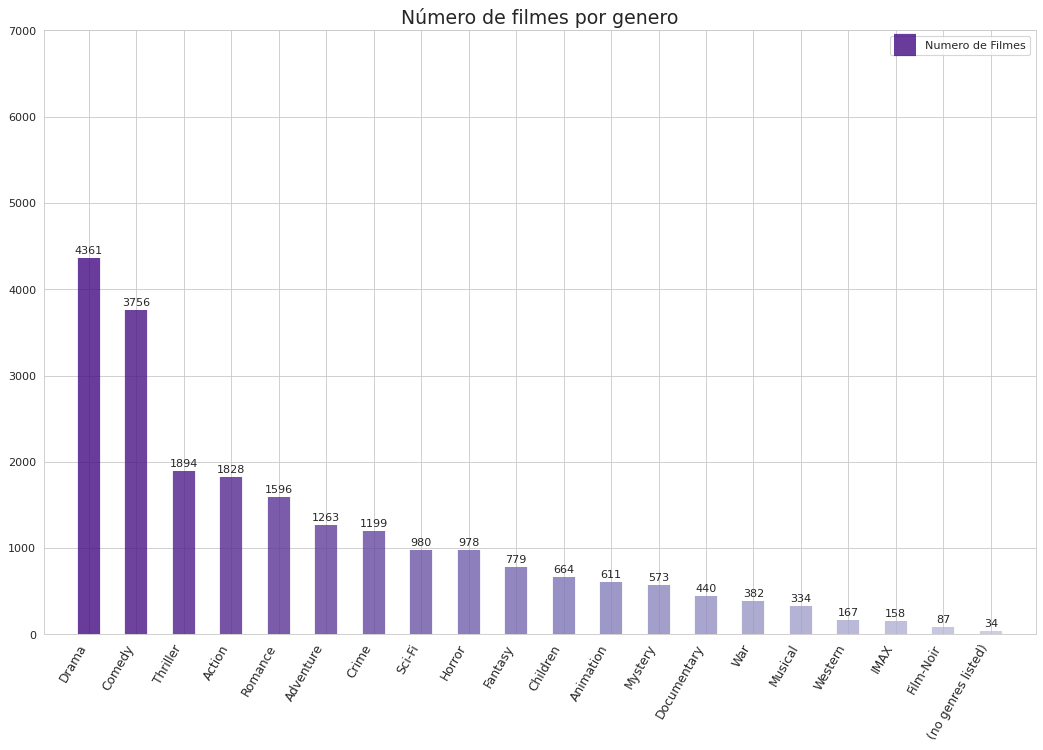

In [812]:
#Fazendo um plot de barramas
#Preparar o dicionario
df = pd.DataFrame.from_dict(dicionario_de_generos, 
                            orient='index',
                            columns=['numero'])
df = df.sort_values(by='numero', ascending=False)
#Plotar o gráfico
fig, ax = plt.subplots(1, 1, figsize=(16,10), dpi= 80)
ax.vlines(x=df.index, 
          ymin=0, ymax=df.numero, 
          color=sns.color_palette('Purples_r', n_colors=len(filmes_por_genero)+10), alpha=0.8, linewidth=20,label='Numero de Filmes')

#Colocar o texto no top da barra
for i, numero in enumerate(df.numero):
    ax.text(i, numero+50, numero, horizontalalignment='center')

#Titulo e coisas bonitas
ax.set_title('Número de filmes por genero', fontsize=17)
ax.set(ylim=(0, 7000))
plt.xticks(df.index, df.index , rotation=60, horizontalalignment='right', fontsize=11)

#Despachando
plt.grid(True, axis='y')
plt.legend()

# DIA 2 - Média, medianas e vizualização de dados

In [813]:
filmes_por_genero = filmes_mod['generos'].str.get_dummies('|').sum()\
    .sort_values(ascending=False)

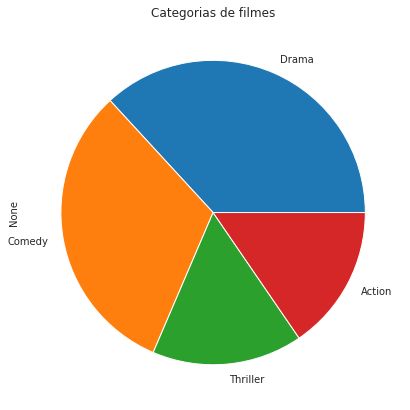

In [814]:
filmes_por_genero[0:4].plot(kind="pie", title="Categorias de filmes",
        figsize=(12,7), )

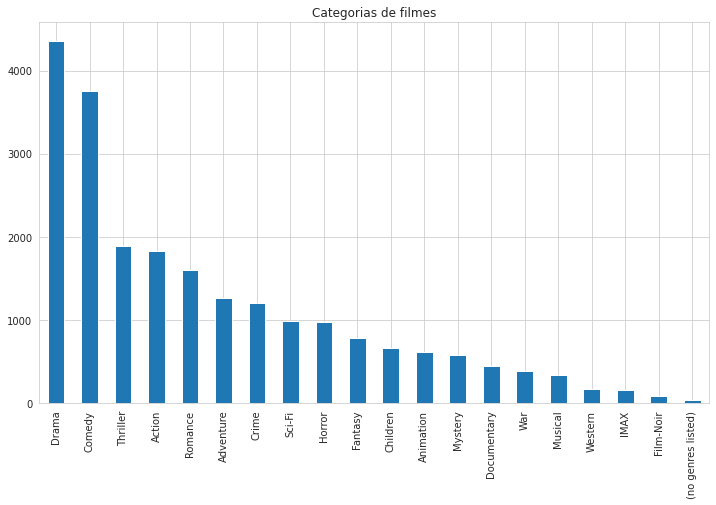

In [815]:
filmes_por_genero.plot(kind="bar", title="Categorias de filmes",
        figsize=(12,7))

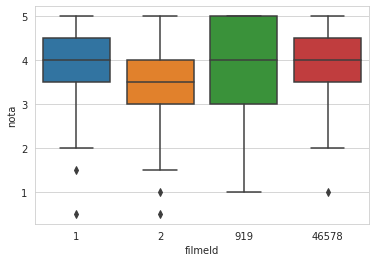

In [816]:
sns.boxplot(data = avaliacoes.query("filmeId in [1,2,919,46578]"), x ="filmeId", y="nota")
plt.show()

## Desafio 1:
Rotacionar os thicks (os nomes dos generos) do gráfico de barras verdes (o último), de forma a deixar as legendas mais legíveis.

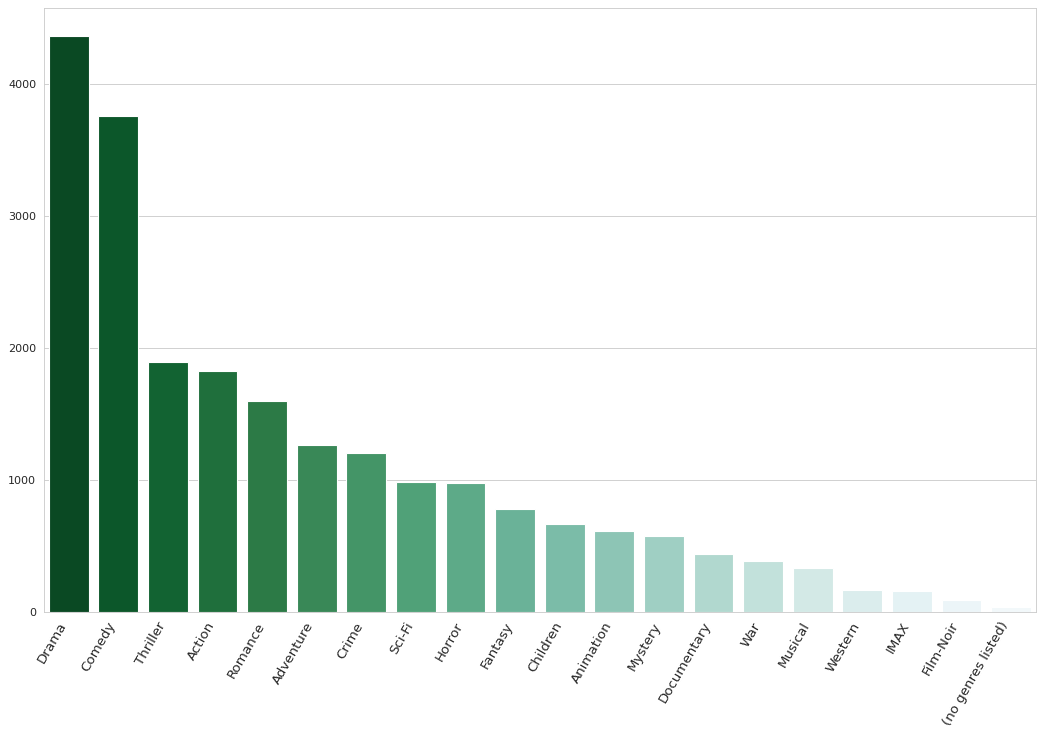

In [817]:
import seaborn as sns
sns.set_style('whitegrid')
fig, ax = plt.subplots(1, 1, figsize=(16,10), dpi= 80)
sns.barplot(x=filmes_por_genero.index, 
            y=filmes_por_genero.values,
            palette=sns.color_palette('BuGn_r', n_colors=len(filmes_por_genero)))

# for index,label in enumerate(filmes_por_genero.values):
#     ax.text(index)
vec = np.arange(len(filmes_por_genero))
plt.xticks(ticks=vec, 
           labels=filmes_por_genero.index , 
           rotation=60, horizontalalignment='right', fontsize=12)

    
plt.show()

## Desafio 2:
Encontar vários filmes com médias próximas e distribuições diferentes, use a função plot_filmes(n) para plotar.

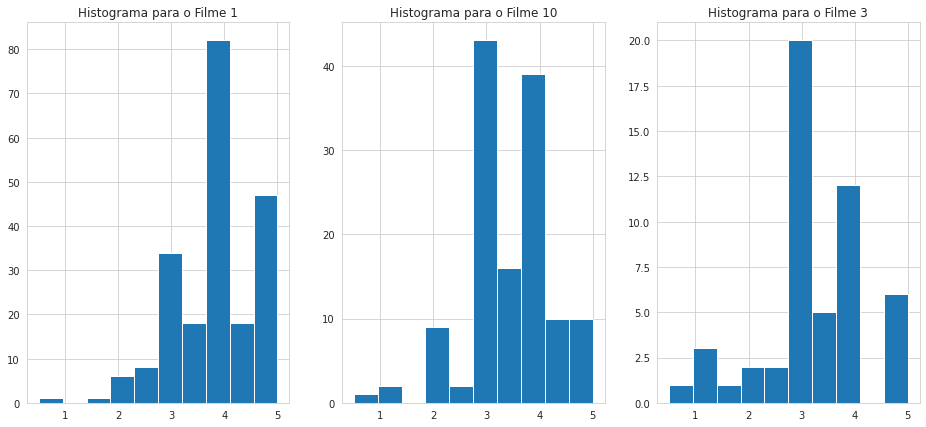

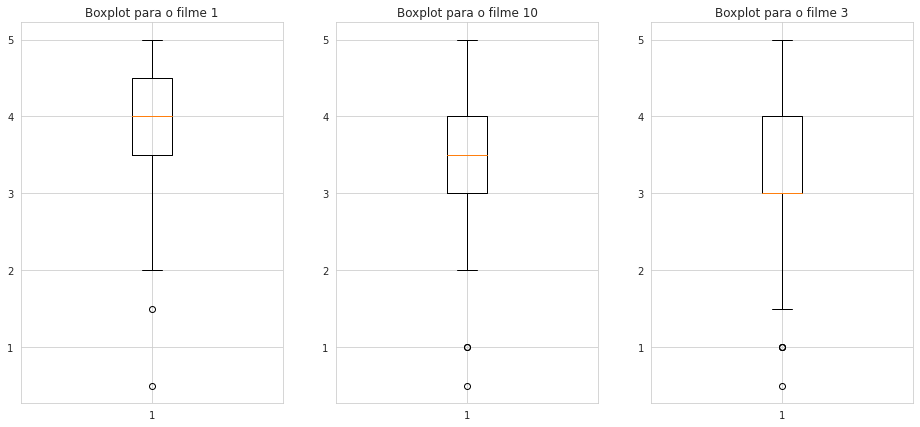

True

In [818]:
import random
def plot_filme(sample_list):
    notas_do_filme = []
    labels = []
    step = 0
    for f_id in sample_list:
        notas_do_filme.append(avaliacoes.query(f"filmeId=={f_id+step}")["nota"])
        labels.append(f_id+step)  
        
    
    fig1, axes1 = plt.subplots(nrows=1, ncols=len(sample_list), figsize=(16,7)) 
    for index,ax in enumerate(axes1):
        ax.hist(notas_do_filme[index],label=labels[index])
        #ax.legend(title='Filme Id',loc=2, fontsize='small', fancybox=True)
        ax.set_title("Histograma para o Filme {}".format(labels[index]))
    plt.show()
    
 
    fig2, axes2 = plt.subplots(nrows=1, ncols=len(sample_list), figsize=(16,7)) 
    for index, ax in enumerate(axes2): 
        ax.boxplot(notas_do_filme[index])
        ax.set_title("Boxplot para o filme {}".format(labels[index]))
    plt.show()
    
    return True
plot_filme([1,10,3])

Ranking dos filmes com mais votos:


filmeId
356     329
318     317
296     307
593     279
2571    278
260     251
480     238
110     237
589     224
527     220
Name: nota, dtype: int64

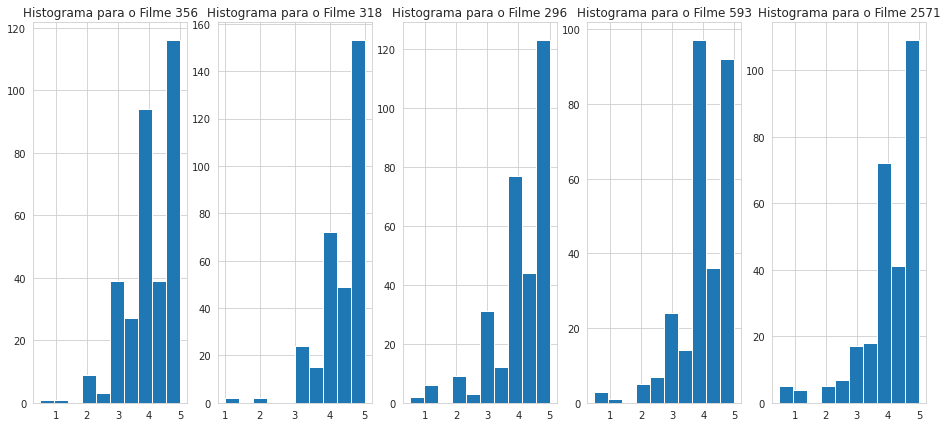

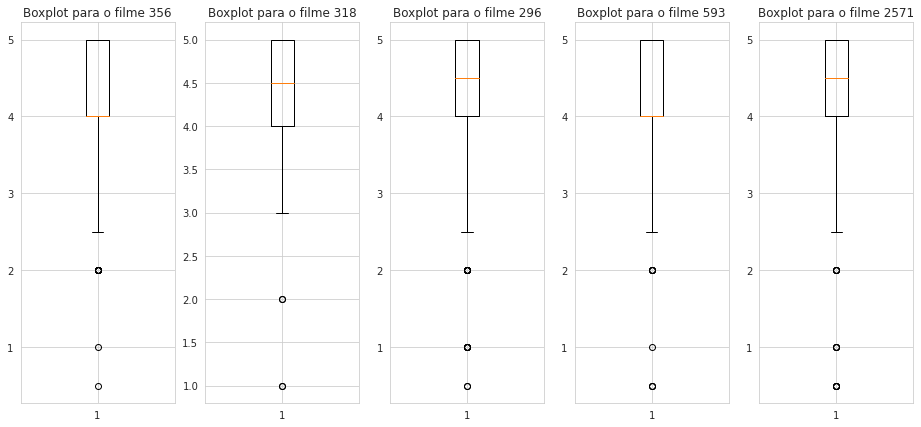

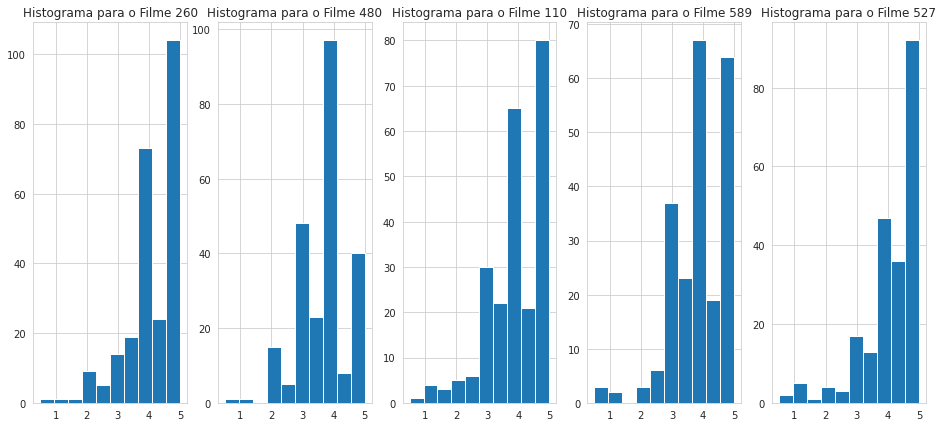

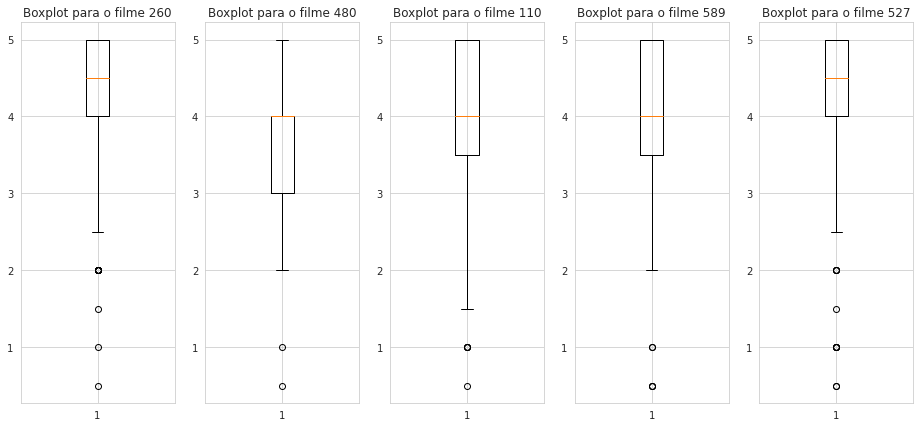

True

In [819]:
filmes_com_mais_votos = avaliacoes.groupby('filmeId')['nota'].count()\
    .sort_values(ascending=False).head(10)
print('Ranking dos filmes com mais votos:')
display(filmes_com_mais_votos)
print('\n')
plot_filme(filmes_com_mais_votos[0:5].index)
print('\n')
plot_filme(filmes_com_mais_votos[5:10].index)

## Desafio 4 
- Configurar a visualização do boxplot gerado pelo seaborn (último boxplot plotado na aula). Configurar o tamanho e colocar o nome dos filmes nos thicks.

In [820]:
lista_de_filmes = [1,2,919,46578]
filmes.query("filmeId in {}".format(lista_de_filmes))['titulo']
x = avaliacoes.query("filmeId in {}".format(lista_de_filmes)).sort_values('filmeId')
x.groupby('filmeId')['nota'].mean()

filmeId
1        3.920930
2        3.431818
919      3.880435
46578    3.883117
Name: nota, dtype: float64

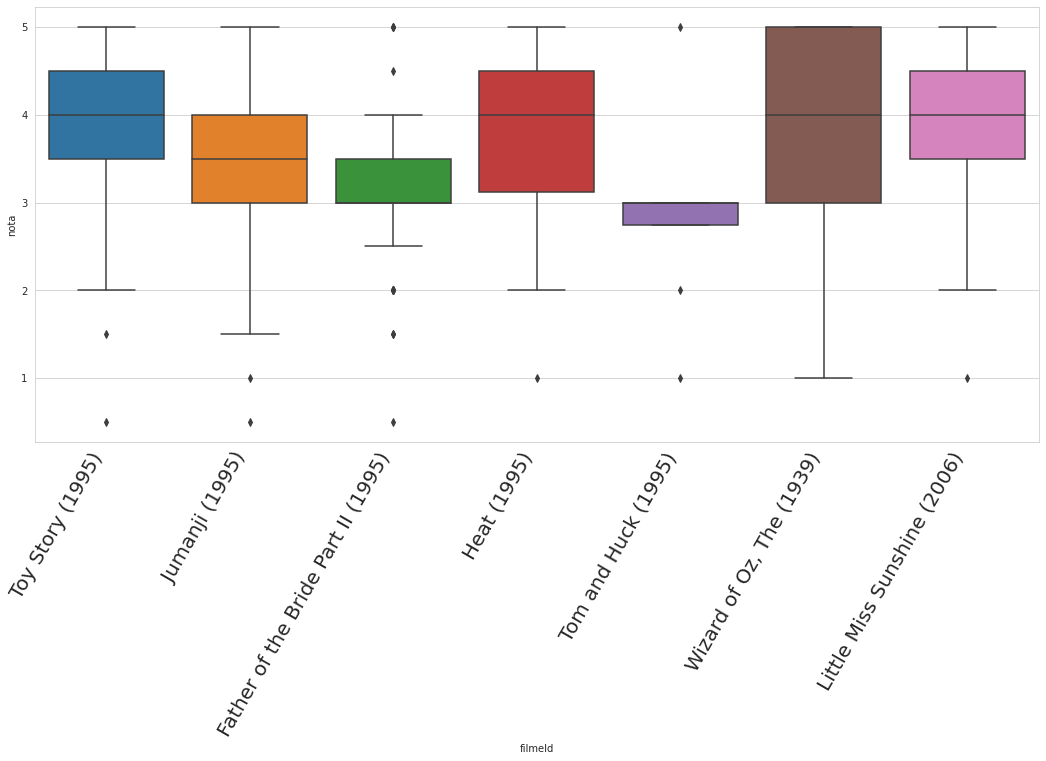

In [821]:
#Cria uma instancia de figura e eixos com o tamanho desejado
plt.figure(figsize=(18,8))

#Lista de Ids de filmes a serem usados
lista_de_filmes = [1,2,919,46578,5,6,8]

#Extrai as samples a serem usados no plot dos dataframes respectivos
avaliacoes_sample = avaliacoes.query("filmeId in {}".format(lista_de_filmes))
name_values = filmes.query("filmeId in {}".format(lista_de_filmes))['titulo']

#Plot da caixa
ax = sns.boxplot(data = avaliacoes_sample , 
                 x ='filmeId' , y="nota")

#Troca os xticks usando o elementos da lista de filmes como referência
plt.xticks(np.arange(len(lista_de_filmes)), name_values)
plt.xticks(rotation = 60, fontsize=20, horizontalalignment='right')
plt.show()

## Desafio 5
- Calcular moda, média e mediana dos filmes. 
- Explore filmes com notas mais próximas de 0.5, 3 e 5.

In [822]:
#Extraindo a mediana e a moda das avaliacoes e adicionando ela ao df de filmes
##Para achar a moda foi necessário usar um metodo agg já que o groupby nao possui o metodo de moda 
av_median = avaliacoes.groupby('filmeId')['nota'].median()
filmes_com_stats = filmes_com_media.join(av_median, on="filmeId")
filmes_com_stats.rename(columns = {'nota':'mediana'},inplace=True)

av_mode = avaliacoes.groupby('filmeId').agg(pd.Series.mode).rename(columns = {'nota':'moda'})
filmes_com_stats = filmes_com_stats.join(av_mode, on='filmeId')
filmes_com_stats['nota_media'] = filmes_com_stats['nota_media'].apply(lambda x: round(x,2))
display(filmes_com_stats.head(5))

,filmeId,titulo,generos,nota_media,mediana,moda
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92,4.0,4
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43,3.5,4
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26,3.0,3
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36,3.0,3
4,5,Father of the Bride Part II (1995),Comedy,3.07,3.0,3


## Desafio 6 
- Plotar o boxplot e o histograma um do lado do outro (na mesma figura ou em figuras distintas, mas um do lado do outro).

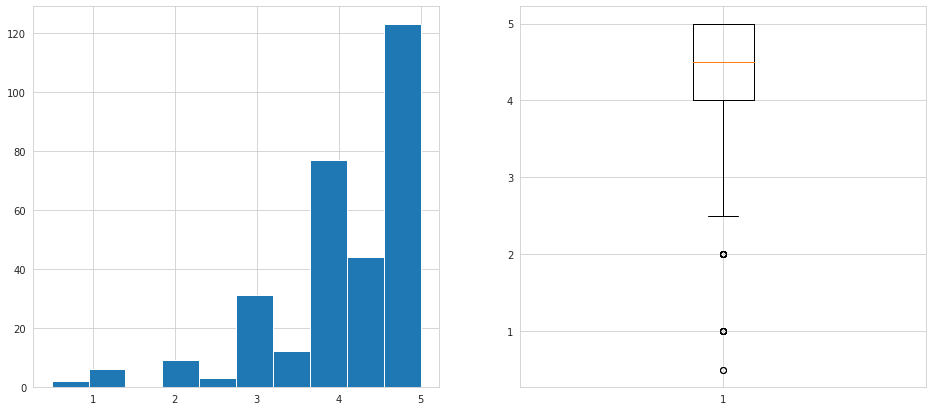

In [823]:
#Definindo ma função que plota histograma e caixa para um dado filme da lista
def plot_filme(n):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16,7)) 
    ax[0].hist(avaliacoes.query(f'filmeId == {n}')['nota'])
    ax[1].boxplot(avaliacoes.query(f'filmeId == {n}')['nota'])
    plt.plot()
plot_filme(296)

## Desafio 7 
- Criar um gráfico de notas médias por ano (média geral considerando todos os filmes lançados naquele ano).

In [824]:
'''
def fetch_year(titulo):
    tokens = titulo.replace('(','').replace(')','').\
        replace('-',' ').split()
    x = [int(s) for s in tokens if s.isdigit()]
    
    return x[-1] if x else 'Not defined'
'''
sample = filmes_com_stats
sample.dropna()
sample['ano'] = sample['titulo'].str.extract("\((\d{4})\)")


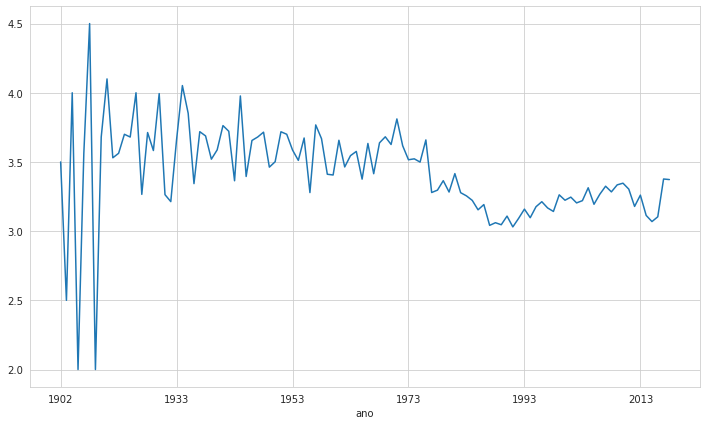

In [825]:
medias_por_ano = sample.groupby('ano').mean()['nota_media']
plt.figure(figsize=(12,7))
medias_por_ano.plot(kind='line')
plt.show()